# 10 minutes to pandas
https://pandas.pydata.org/pandas-docs/version/1.0.0/getting_started/10min.html

In [2]:
import numpy as np
import pandas as pd

## Object Creation

리스트 값을 이용해서 시리즈를 마는다.

인덱스의 기본값은 정수형이다.

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

넘파이 배열을 통해서 데이터프레임을 생성한다.

In [4]:
dates = pd.date_range('20130101', periods=6) # 날짜 범위, 1부터 기간이 늘어남
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

## 문자열을 리스트에 넣으면 각각 끊어져서 들어간다.

In [5]:
# 6행 4열의 랜덤한 실수값인데 값의 범위 기준은 평균0 표준편차1 인가?
# 인덱스는 위에서 만든 리스트의 값을 반환한다.
# 컬럼은 문자열을 이어 썼을 때, 각각 나눠서 컬럼에 반환한다. 문자열을 리스트에 넣으면
# 각각 끊어져서 들어감
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.427847,-0.434305,-0.720286,0.794369
2013-01-02,-0.688703,-2.034272,0.447370,-0.284761
2013-01-03,-1.977401,-0.026131,0.179773,-0.908286
2013-01-04,-1.406099,-0.976071,-0.856906,-0.404165
2013-01-05,0.888544,1.133024,-0.180618,-1.660078
2013-01-06,-0.183567,-0.874029,-1.845900,1.107583


딕셔너리 구조로 데이터프레임 생성

컬럼에 들어가는 값들이 다양한 방식으로 만들어졌다.

In [6]:
df2 = pd.DataFrame({
    'A': 1., # 실수형
    'B': pd.Timestamp('20130102'), # 날짜형
    'C': pd.Series(1, index=list(range(4)), dtype='float32'), # 시리즈형(인덱스지정)
#    아래처럼 인덱스를 단순 range를 반환하는게 아니라, list인 range를 반환해야 한다.
#    'C': pd.Series(1, index=range(4), dtype='float32'), # 시리즈형(인덱스지정)    
    'D': np.array([3] * 4, dtype='int32'), # array에 3을 4번 넣어라
    'E': pd.Categorical(['test', 'train', 'test', 'train']), # 그냥 리스트로 넣어도 될텐데?
    'F': 'foo' # 문자형
})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# 위의 컬럼별 데이터 형태가 다름
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

데이터프레임을 넘파이배열로 변경시키는 방법이다.

데이터프레임은 컬럼당 dtype을 갖지만,

넘파이는 전체가 동일한 dtype을 가진다는 차이가 있다.

**인덱스나 컬럼을 반환하지는 않는다**

In [8]:
# df가 실수일때 변경하면?
df.to_numpy()

array([[ 0.42784738, -0.43430534, -0.72028587,  0.79436853],
       [-0.68870307, -2.03427154,  0.44736993, -0.28476079],
       [-1.9774008 , -0.02613149,  0.17977339, -0.90828578],
       [-1.4060994 , -0.97607082, -0.85690565, -0.40416534],
       [ 0.88854386,  1.1330238 , -0.180618  , -1.66007793],
       [-0.18356682, -0.87402886, -1.84590042,  1.10758269]])

In [9]:
# df가 혼합되어있을 때 변경하면?
df2.to_numpy()

# dtype를 모두 object로 바꾼다.

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [10]:
df

,A,B,C,D
2013-01-01,0.427847,-0.434305,-0.720286,0.794369
2013-01-02,-0.688703,-2.034272,0.447370,-0.284761
2013-01-03,-1.977401,-0.026131,0.179773,-0.908286
2013-01-04,-1.406099,-0.976071,-0.856906,-0.404165
2013-01-05,0.888544,1.133024,-0.180618,-1.660078
2013-01-06,-0.183567,-0.874029,-1.845900,1.107583


In [11]:
# 인덱스나 컬럼 기준으로 솔팅을 할 수 있다. value기준이 아님.
# value는 sort_values일 것.
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.794369,-0.720286,-0.434305,0.427847
2013-01-02,-0.284761,0.447370,-2.034272,-0.688703
2013-01-03,-0.908286,0.179773,-0.026131,-1.977401
2013-01-04,-0.404165,-0.856906,-0.976071,-1.406099
2013-01-05,-1.660078,-0.180618,1.133024,0.888544
2013-01-06,1.107583,-1.845900,-0.874029,-0.183567


위의 과정을 스텝을 -1씩 줘서 역순으로 sort하는 방법.
https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221644407877&parentCategoryNo=&categoryNo=22&viewDate=&isShowPopularPosts=false&from=postList

뒤집은 것을 가지고 index를 0부터 끝까지 다시 부여하는 방법도 있음.

## Selection

.at, .iat, .loc, .iloc에 관련된 내용

보통 숫자로 행 몇개를 뽑을 때 슬라이싱 하면 iloc을 쓸 것 같지만,

사용의 편의성을 위해서인지 바로 []에 슬라이싱을 활용 가능하도록 설계

보통 바로 df['블라']를 쓰는건 열을 뽑지만 숫자 슬라이싱을 쓰는게 편의를 고려한 문법 같음

https://www.codeit.kr/learn/1339 (row 위치의 리스트 슬라이싱 단축형)

In [12]:
# iloc를 사용하지 않고 숫자로 인덱싱
df[0:3]

,A,B,C,D
2013-01-01,0.427847,-0.434305,-0.720286,0.794369
2013-01-02,-0.688703,-2.034272,0.447370,-0.284761
2013-01-03,-1.977401,-0.026131,0.179773,-0.908286


In [13]:
# 날짜형 순서대로
df['20130102': '20130104']

,A,B,C,D
2013-01-02,-0.688703,-2.034272,0.447370,-0.284761
2013-01-03,-1.977401,-0.026131,0.179773,-0.908286
2013-01-04,-1.406099,-0.976071,-0.856906,-0.404165


## Selection by label

In [14]:
df.loc['20130102', ['A', 'B']].to_frame().T

,A,B
2013-01-02,-0.688703,-2.034272


In [15]:
df.loc[dates[0], 'A']

0.42784737574155524

특정 **스칼라**에 빠르게 접근하고자 하면 loc을 통해서 행, 렬을 입력하는 것보다
.at 을 통해서 동일하게 입력하는 방법이 있다.

In [16]:
df.at[dates[0], 'A']

0.42784737574155524

## Selection by position

In [17]:
df.iloc[3]

A   -1.406099
B   -0.976071
C   -0.856906
D   -0.404165
Name: 2013-01-04 00:00:00, dtype: float64

In [18]:
df.iloc[[1,2,4], [0,2]]
# 스타크래프트2 데이터셋 APM 비교하기 위해서 추출할 때 내가 쓰던 방법

,A,C
2013-01-02,-0.688703,0.447370
2013-01-03,-1.977401,0.179773
2013-01-05,0.888544,-0.180618


In [19]:
df.iloc[1, 1]

-2.034271538593815

In [20]:
# 위에서 말한것과 동일한 방법
df.iat[1, 1]

-2.034271538593815

## Boolean indexing

In [21]:
# A열에서 0보다 큰 행을 모두 추출
df[df['A'] > 0]

,A,B,C,D
2013-01-01,0.427847,-0.434305,-0.720286,0.794369
2013-01-05,0.888544,1.133024,-0.180618,-1.660078


In [22]:
# 전체 데이터프레임에서 해당 조건을 충족하는 값만 추출, 나머지는 NaN
df[df > 0]

,A,B,C,D
2013-01-01,0.427847,NaN,NaN,0.794369
2013-01-02,NaN,NaN,0.447370,NaN
2013-01-03,NaN,NaN,0.179773,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,0.888544,1.133024,NaN,NaN
2013-01-06,NaN,NaN,NaN,1.107583


In [23]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.427847,-0.434305,-0.720286,0.794369,one
2013-01-02,-0.688703,-2.034272,0.447370,-0.284761,one
2013-01-03,-1.977401,-0.026131,0.179773,-0.908286,two
2013-01-04,-1.406099,-0.976071,-0.856906,-0.404165,three
2013-01-05,0.888544,1.133024,-0.180618,-1.660078,four
2013-01-06,-0.183567,-0.874029,-1.845900,1.107583,three


In [24]:
# 해당열에 있는 값이 있는 행을 뽑는다.
# 여기서 isin 내부에 있는 리스트값을 OR로 연결한 것 같음
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.977401,-0.026131,0.179773,-0.908286,two
2013-01-05,0.888544,1.133024,-0.180618,-1.660078,four


## Setting

In [25]:
s1 = pd.Series([i for i in range(1, 7)], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [26]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.427847,-0.434305,-0.720286,0.794369,NaN
2013-01-02,-0.688703,-2.034272,0.447370,-0.284761,1.0
2013-01-03,-1.977401,-0.026131,0.179773,-0.908286,2.0
2013-01-04,-1.406099,-0.976071,-0.856906,-0.404165,3.0
2013-01-05,0.888544,1.133024,-0.180618,-1.660078,4.0
2013-01-06,-0.183567,-0.874029,-1.845900,1.107583,5.0


In [27]:
# 행에 접근하는 것을 인덱스를 갖는 변수를 활용한다는 것을 생각
df.at[dates[0], 'A'] = 0

In [28]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720286,0.794369,NaN
2013-01-02,-0.688703,-2.034272,0.447370,-0.284761,1.0
2013-01-03,-1.977401,-0.026131,0.179773,-0.908286,2.0
2013-01-04,-1.406099,-0.976071,-0.856906,-0.404165,3.0
2013-01-05,0.888544,1.133024,-0.180618,-1.660078,4.0
2013-01-06,-0.183567,-0.874029,-1.845900,1.107583,5.0


#### 판다스 데이터를 추가할때 아래와 같은 표현 익숙해지기(넘파이 사용)

행의 길이를 len(df)로 이해 shape[0]도 괜찮지만.

In [29]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720286,5,NaN
2013-01-02,-0.688703,-2.034272,0.447370,5,1.0
2013-01-03,-1.977401,-0.026131,0.179773,5,2.0
2013-01-04,-1.406099,-0.976071,-0.856906,5,3.0
2013-01-05,0.888544,1.133024,-0.180618,5,4.0
2013-01-06,-0.183567,-0.874029,-1.845900,5,5.0


#### 0 보다 큰 값을 모두 마이너스로 바꾸는 방법

## 이 부분 이해가 잘 안되네

In [30]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720286,-5,NaN
2013-01-02,-0.688703,-2.034272,-0.447370,-5,-1.0
2013-01-03,-1.977401,-0.026131,-0.179773,-5,-2.0
2013-01-04,-1.406099,-0.976071,-0.856906,-5,-3.0
2013-01-05,-0.888544,-1.133024,-0.180618,-5,-4.0
2013-01-06,-0.183567,-0.874029,-1.845900,-5,-5.0


## Missing data

reindex 하는 방법

다양한 방법으로 인덱스와 컬럼을 바꿈

In [31]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720286,5,NaN
2013-01-02,-0.688703,-2.034272,0.447370,5,1.0
2013-01-03,-1.977401,-0.026131,0.179773,5,2.0
2013-01-04,-1.406099,-0.976071,-0.856906,5,3.0
2013-01-05,0.888544,1.133024,-0.180618,5,4.0
2013-01-06,-0.183567,-0.874029,-1.845900,5,5.0


In [32]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

#### 아래의 row 슬라이싱이 dates[1]의 값까지 포함하는 이유가 뭐지?

숫자인 경우는 n-1까지인데, 인덱스나 문자열은 끝에서 끝까지 같음

In [62]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [60]:
df1.loc['20130101':'20130103', 'E'] = 2

In [63]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.720286,5,NaN,1.0
2013-01-02,-0.688703,-2.034272,0.447370,5,1.0,1.0
2013-01-03,-1.977401,-0.026131,0.179773,5,2.0,2.0
2013-01-04,-1.406099,-0.976071,-0.856906,5,3.0,NaN


In [65]:
# 하나의 값이라도 NaN이 있으면 그 행을 전체 제거
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.688703,-2.034272,0.447370,5,1.0,1.0
2013-01-03,-1.977401,-0.026131,0.179773,5,2.0,2.0


In [36]:
# axis값이 디폴트가 행으로 되어있음
df1.dropna(axis=1, how='any')

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.720286,5
2013-01-02,-0.688703,-2.034272,0.447370,5
2013-01-03,-1.977401,-0.026131,0.179773,5
2013-01-04,-1.406099,-0.976071,-0.856906,5


In [37]:
# 모든 NaN값을 5로 채우기
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.720286,5,5.0,1.0
2013-01-02,-0.688703,-2.034272,0.447370,5,1.0,1.0
2013-01-03,-1.977401,-0.026131,0.179773,5,2.0,5.0
2013-01-04,-1.406099,-0.976071,-0.856906,5,3.0,5.0


In [38]:
# df1에 있는 NaN값이 있는 경우 해당 부분을 True 불린 값으로 반환
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Opeartions

### Stats
오퍼레이션은 보통 널값을 무시하고 계산한다.

In [39]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720286,5,NaN
2013-01-02,-0.688703,-2.034272,0.447370,5,1.0
2013-01-03,-1.977401,-0.026131,0.179773,5,2.0
2013-01-04,-1.406099,-0.976071,-0.856906,5,3.0
2013-01-05,0.888544,1.133024,-0.180618,5,4.0
2013-01-06,-0.183567,-0.874029,-1.845900,5,5.0


In [40]:
# 갑자기 생각난 컬럼 네임 바꾸기. 
# 1. rename - 1:1로 바꿈
# 2. .columns = [] 형태로 컬럼에 리스트 값을 반환
df_test = df.mean(axis=1).to_frame()
df_test.rename(columns={0:'mean'}, inplace=True)
df_test

,mean
2013-01-01,1.069929
2013-01-02,0.744879
2013-01-03,1.035248
2013-01-04,0.952185
2013-01-05,2.168190
2013-01-06,1.419301


In [41]:
# 데이터프레임의 평균 구하기 - 디폴트값은 열마다 구해짐 
# 우리가 보기엔 열인데, 그림상으론 행을 의미해서 디폴트 값이 0인듯?
df.mean()

A   -0.561204
B   -0.462913
C   -0.496094
D    5.000000
F    3.000000
dtype: float64

In [42]:
# 이게 1로 바꾼 값. 
# 엄밀히는 이게 행이라 0인거 같은데 열끼리 더해서 평균을 냈다고 봐야하나?
df.mean(1)

2013-01-01    1.069929
2013-01-02    0.744879
2013-01-03    1.035248
2013-01-04    0.952185
2013-01-05    2.168190
2013-01-06    1.419301
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

https://dandyrilla.github.io/2017-08-12/pandas-10min/

In [43]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
# shift(2)는 두개씩 밀어버리라는 의미인가?
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [44]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720286,5,NaN
2013-01-02,-0.688703,-2.034272,0.447370,5,1.0
2013-01-03,-1.977401,-0.026131,0.179773,5,2.0
2013-01-04,-1.406099,-0.976071,-0.856906,5,3.0
2013-01-05,0.888544,1.133024,-0.180618,5,4.0
2013-01-06,-0.183567,-0.874029,-1.845900,5,5.0


In [45]:
# 인덱스 기준으로 데이터프레임에서 s라는 시리즈값이 있는 부분만 빼준 것.
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.977401,-1.026131,-0.820227,4.0,1.0
2013-01-04,-4.406099,-3.976071,-3.856906,2.0,0.0
2013-01-05,-4.111456,-3.866976,-5.180618,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

cumsum은 연속으로 더해주는 함수이다.

아래 내용은 조금 더 살펴봐야 할듯

In [46]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720286,5,NaN
2013-01-02,-0.688703,-2.034272,0.447370,5,1.0
2013-01-03,-1.977401,-0.026131,0.179773,5,2.0
2013-01-04,-1.406099,-0.976071,-0.856906,5,3.0
2013-01-05,0.888544,1.133024,-0.180618,5,4.0
2013-01-06,-0.183567,-0.874029,-1.845900,5,5.0


In [47]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720286,5,NaN
2013-01-02,-0.688703,-2.034272,-0.272916,10,1.0
2013-01-03,-2.666104,-2.060403,-0.093143,15,3.0
2013-01-04,-4.072203,-3.036474,-0.950048,20,6.0
2013-01-05,-3.183659,-1.903450,-1.130666,25,10.0
2013-01-06,-3.367226,-2.777479,-2.976567,30,15.0


In [48]:
df.apply(lambda x: x.max() - x.min())

A    2.865945
B    3.167295
C    2.293270
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

3    3
6    2
1    2
5    1
4    1
0    1
dtype: int64

## String Methods

In [68]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
## Concat

In [69]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.602101,0.061951,0.284742,1.258403
1,0.459631,-0.791202,0.194530,0.366908
2,0.380479,0.414883,0.881185,0.350010
3,1.614704,-2.087596,-0.513189,0.502797
4,-1.250589,1.188065,0.673756,-1.758295
5,0.146390,-1.470462,-0.106569,-0.402252
6,-1.463741,0.870554,0.621955,-1.390361
7,-1.184258,0.385325,0.468534,-0.120565
8,0.245024,-0.731934,0.230614,0.363422
9,0.763280,-0.235645,1.067083,0.318310


리스트 값 안에 데이터프레임의 행을 배분해서 넣는다/

In [76]:
pieces = [df[:3], df[3:7], df[7:]]
pieces[0], pieces[1], pieces[2]

(          0         1         2         3
 0 -1.602101  0.061951  0.284742  1.258403
 1  0.459631 -0.791202  0.194530  0.366908
 2  0.380479  0.414883  0.881185  0.350010,
           0         1         2         3
 3  1.614704 -2.087596 -0.513189  0.502797
 4 -1.250589  1.188065  0.673756 -1.758295
 5  0.146390 -1.470462 -0.106569 -0.402252
 6 -1.463741  0.870554  0.621955 -1.390361,
           0         1         2         3
 7 -1.184258  0.385325  0.468534 -0.120565
 8  0.245024 -0.731934  0.230614  0.363422
 9  0.763280 -0.235645  1.067083  0.318310)

In [73]:
pd.concat(pieces)

,0,1,2,3
0,-1.602101,0.061951,0.284742,1.258403
1,0.459631,-0.791202,0.194530,0.366908
2,0.380479,0.414883,0.881185,0.350010
3,1.614704,-2.087596,-0.513189,0.502797
4,-1.250589,1.188065,0.673756,-1.758295
5,0.146390,-1.470462,-0.106569,-0.402252
6,-1.463741,0.870554,0.621955,-1.390361
7,-1.184258,0.385325,0.468534,-0.120565
8,0.245024,-0.731934,0.230614,0.363422
9,0.763280,-0.235645,1.067083,0.318310


참고: 데이터프레임에서 열을 추가하는건 빠른데, 행을 추가하는건 복사하는 과정이 있어서 느림.

Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it. See Appending to dataframe for more.

## Join

In [78]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [79]:
right

,key,rval
0,foo,4
1,foo,5


In [80]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [81]:
# 다른 예시
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [82]:
right

,key,rval
0,foo,4
1,bar,5


In [83]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

In [84]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B': ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C': np.random.randn(8),
   ....:                    'D': np.random.randn(8)})
 

In [85]:
df

,A,B,C,D
0,foo,one,0.113592,0.441510
1,bar,one,-0.236173,-0.534024
2,foo,two,-1.481892,-1.217089
3,bar,three,0.569511,-0.070694
4,foo,two,-1.327063,1.443124
5,bar,two,-0.607755,-0.300793
6,foo,one,-1.589674,-1.013159
7,foo,three,1.973805,-0.761450


In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.274418,-0.905510
foo,-2.311232,-1.107064


In [93]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.236173 -0.534024
    three  0.569511 -0.070694
    two   -0.607755 -0.300793
foo one   -1.476082 -0.571649
    three  1.973805 -0.761450
    two   -2.808955  0.226035

# Reshaping

## Stack

zip과 asterisk의 개념 숙지

In [95]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [101]:
# 연습
list(zip(*[['bar', 'bar', 'baz'], ['one', 'two', 'one']]))

[('bar', 'one'), ('bar', 'two'), ('baz', 'one')]

멀티인덱스를 활용해서 데이터프레임 만들기

In [103]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [104]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [105]:
df2 = df[:4]

In [106]:
df2

A         B
first second                    
bar   one     0.518438 -2.089641
      two    -0.445641  1.000028
baz   one    -0.364360 -0.693113
      two    -1.289967  0.912950

In [109]:
df

A         B
first second                    
bar   one     0.518438 -2.089641
      two    -0.445641  1.000028
baz   one    -0.364360 -0.693113
      two    -1.289967  0.912950
foo   one    -0.098146  0.042667
      two     0.217225 -0.389228
qux   one    -0.041935 -0.586671
      two    -0.434574  0.765725

스택은 컬럼 네임을 각 행 인덱스 옆에다가 배정시키는 것

In [113]:
stacked = df.stack()
stacked

first  second   
bar    one     A    0.518438
               B   -2.089641
       two     A   -0.445641
               B    1.000028
baz    one     A   -0.364360
               B   -0.693113
       two     A   -1.289967
               B    0.912950
foo    one     A   -0.098146
               B    0.042667
       two     A    0.217225
               B   -0.389228
qux    one     A   -0.041935
               B   -0.586671
       two     A   -0.434574
               B    0.765725
dtype: float64

In [118]:
df

A         B
first second                    
bar   one     0.518438 -2.089641
      two    -0.445641  1.000028
baz   one    -0.364360 -0.693113
      two    -1.289967  0.912950
foo   one    -0.098146  0.042667
      two     0.217225 -0.389228
qux   one    -0.041935 -0.586671
      two    -0.434574  0.765725

unstack 내부의 파라미터 숫자를 변경하면서 

인덱스0, 1, 2번의 멀티인덱스가 바뀌는것을 확인

In [127]:
df.stack().unstack()

A         B
first second                    
bar   one     0.518438 -2.089641
      two    -0.445641  1.000028
baz   one    -0.364360 -0.693113
      two    -1.289967  0.912950
foo   one    -0.098146  0.042667
      two     0.217225 -0.389228
qux   one    -0.041935 -0.586671
      two    -0.434574  0.765725

# Time series

resampling이 무엇?

In [129]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    23770
Freq: 5T, dtype: int32

In [147]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.178138
2012-03-07    0.566468
2012-03-08    0.229037
2012-03-09   -0.230211
2012-03-10    1.602303
Freq: D, dtype: float64

In [149]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.178138
2012-03-07 00:00:00+00:00    0.566468
2012-03-08 00:00:00+00:00    0.229037
2012-03-09 00:00:00+00:00   -0.230211
2012-03-10 00:00:00+00:00    1.602303
Freq: D, dtype: float64

In [151]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.178138
2012-03-06 19:00:00-05:00    0.566468
2012-03-07 19:00:00-05:00    0.229037
2012-03-08 19:00:00-05:00   -0.230211
2012-03-09 19:00:00-05:00    1.602303
Freq: D, dtype: float64

In [154]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.349167
2012-02-29    0.600568
2012-03-31   -0.053774
2012-04-30    0.134304
2012-05-31    1.286813
Freq: M, dtype: float64

In [156]:
ps = ts.to_period()
ps

2012-01   -0.349167
2012-02    0.600568
2012-03   -0.053774
2012-04    0.134304
2012-05    1.286813
Freq: M, dtype: float64

In [157]:
ps.to_timestamp()

2012-01-01   -0.349167
2012-02-01    0.600568
2012-03-01   -0.053774
2012-04-01    0.134304
2012-05-01    1.286813
Freq: MS, dtype: float64

In [158]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -2.420301
1990-06-01 09:00    0.223502
1990-09-01 09:00   -0.289663
1990-12-01 09:00    0.959730
1991-03-01 09:00    1.018714
Freq: H, dtype: float64

위의 시계 개념들 너무 어렵다.... 이해 아직 다 못함

# Categoricals

In [159]:
df = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6],
                  'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})

In [160]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [161]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [162]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [164]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [168]:
df.sort_values(by='grade', ascending=False)

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


그룹핑 한 것들의 범주별 갯수를 알고 싶을때는 .size()

In [171]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [172]:
import matplotlib.pyplot as plt
plt.close('all')

In [175]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

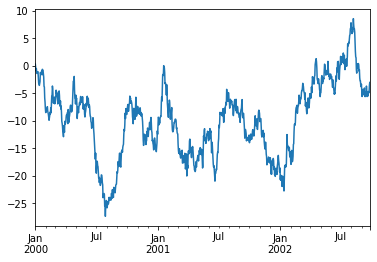

In [176]:
ts.plot()

In [183]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()


In [184]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

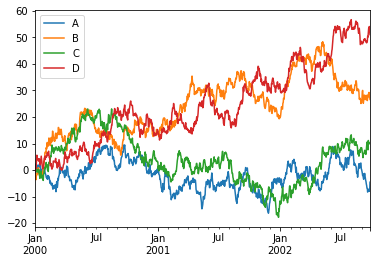

In [185]:
df.plot()

No handles with labels found to put in legend.


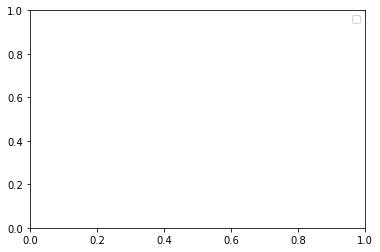

In [186]:
plt.legend(loc='best')

# Getting data in/out

아는 내용이므로 생략

In [188]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

## Gotchas

??
